In [1]:
import pandas as pd

In [2]:
#삼성 데이터 로드
news = pd.read_csv('samsung.csv', header=None, sep=',')
#칼럼설정
news.columns=['날짜', '타이틀', '카테고리', '반응도', '본문']
#날짜 기준으로 기사개수 카운트
news_count = news.groupby(['날짜']).count()['본문']
#시리즈 => 데이터프레임으로 변경
news_count = pd.DataFrame(news_count)

In [5]:
#주가데이터 로드
stock = pd.read_csv('stock.csv', header=None, sep=',')
#칼럼설정
stock.columns=['날짜','주가']
#인덱스 설정
stock.index = stock['날짜']

In [6]:
#뉴스 데이터에 주가데이터 연결
news_count['주가'] = stock['주가']
#주가가 없는 날짜 제거 (주말)
news_count = news_count.dropna()

In [7]:
#백분위를 구하기 위한 데이터 합산
count_sum = news_count.sum()['본문']
stock_sum = news_count.sum()['주가']
#백분위 구히기
news_count['본문백분위'] = news_count['본문'] / count_sum * 100
news_count['삼성전자주가백분위'] = news_count['주가'] / stock_sum * 100

In [8]:
#카테고리 기준으로 데이터 개수 합산
category = news.groupby('카테고리').count()['본문']
#반응도 기준으로 데이터 합산
reactivity = news.groupby('날짜').sum('반응도')

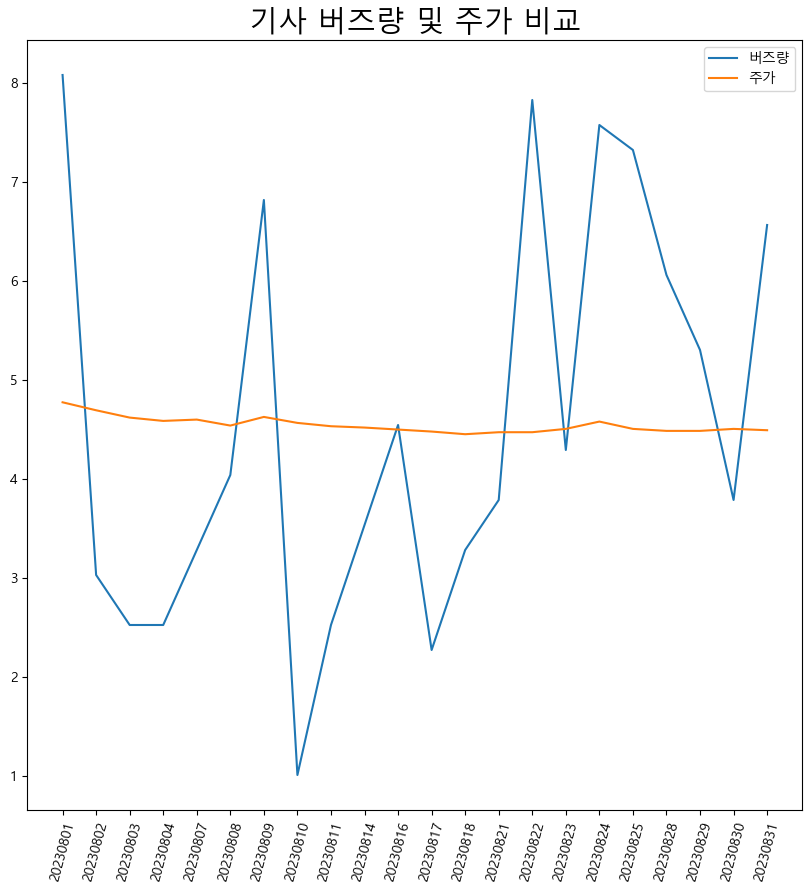

In [11]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') # For Windows

plt.figure(figsize=(10, 10))
plt.title("기사 버즈량 및 주가 비교", fontsize=21)
plt.xticks(rotation=75)

#map 함수를 사용하여 index 내용 문자로 변경
plt.plot(list(map(lambda n: str(n),news_count['본문백분위'].index)), news_count['본문백분위'].values, label='버즈량')
plt.plot(list(map(lambda n: str(n),news_count['삼성전자주가백분위'].index)), news_count['삼성전자주가백분위'].values, label='주가')
plt.legend(loc=1) 
plt.show()

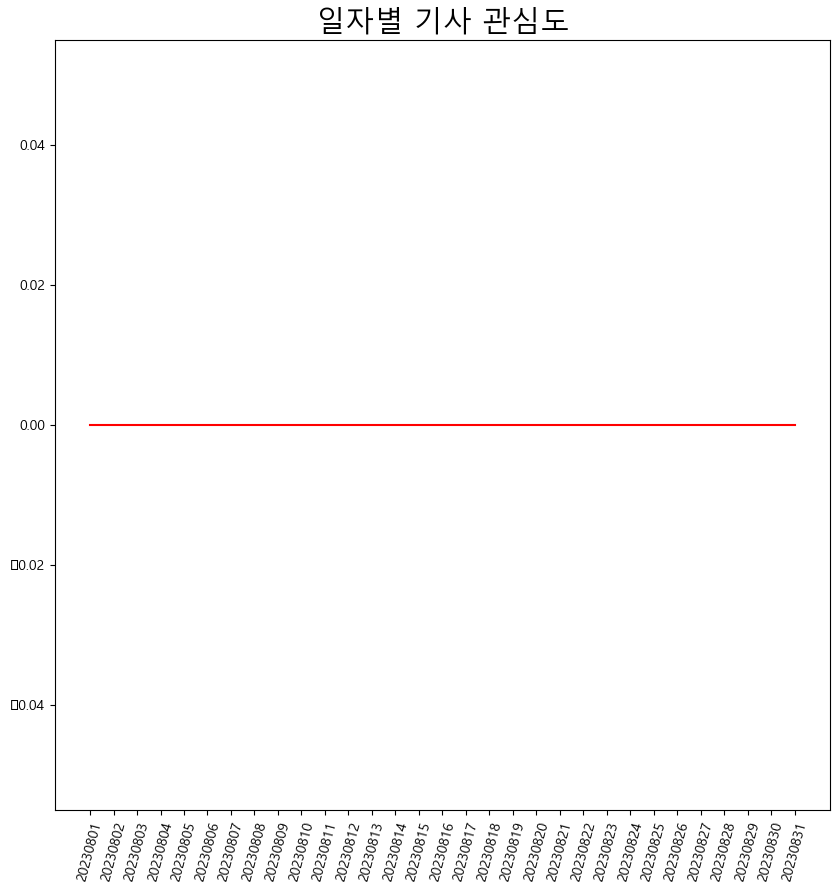

In [13]:
plt.figure(figsize=(10, 10))
plt.title("일자별 기사 관심도", fontsize=21)
plt.xticks(rotation=75)
plt.plot(list(map(lambda n: str(n),reactivity.index)), reactivity.values, color='red')
plt.show()

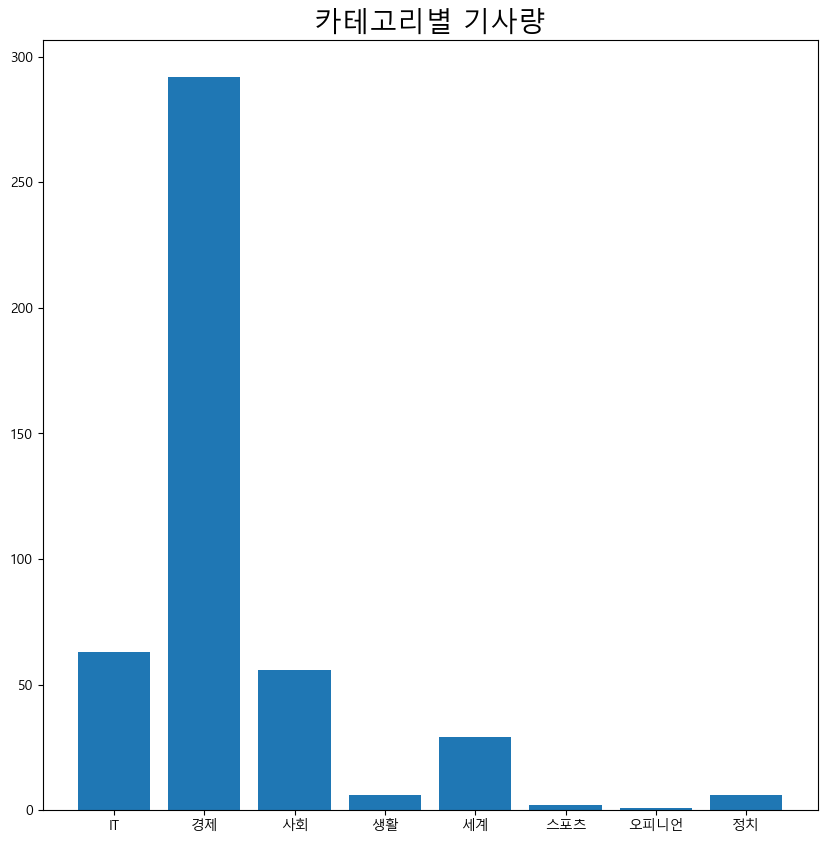

In [14]:
plt.figure(figsize=(10, 10))
plt.title("카테고리별 기사량", fontsize=20)
plt.bar(category.index, category.values)
plt.show()